<div style="background-color: #0074D9; padding: 10px;">
    <h2 style="color: white;">SUPERVISED MACHINE LEARNING MODELS PROJECT</h2>
    <p style="color: white;">  Predicitng Customer Churn for ConnectTel LTD.</p>
</div>


#### The objective of this project is to:
- To prepare dataset to build and train three different models
- Evaluate model accuracy and performance metrics
- To identify high and low performing models
- To optimise the best performing model

#### To achieve the aim of this task;
- We import the dataset using the Wrangle function
- Carry out data cleaning and preprocessing
- Carry out Exploratory Data Analysis to find connection
- Explore the relationship between the target vector and features
- Build and train models suitable for classification tasks
- Optimisation of the models using hyperparameter tuning

## PHASE ONE
- Libraries import from python modules
- Data Overview
- Data cleaning and features engineeering

In [1]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

#import modules from python module
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
#python function to wrangle our data set and import the data set into a dataframe

def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    #feature engineering, renaming some features for easier readability
    df["StreamingMovies"]= df["StreamingMovies"].replace({"No internet service":"No", "Yes":"Yes"})
    df["StreamingTV"]= df["StreamingTV"].replace({"No internet service":"No", "Yes":"Yes"})
    df["TechSupport"]= df["TechSupport"].replace({"No internet service":"No", "Yes":"Yes"})
    df["DeviceProtection"]= df["DeviceProtection"].replace({"No internet service":"No", "Yes":"Yes"})
    df["OnlineBackup"]= df["OnlineBackup"].replace({"No internet service":"No", "Yes":"Yes"})
    df["OnlineSecurity"]= df["OnlineSecurity"].replace({"No internet service":"No", "Yes":"Yes"})
    df["InternetService"]=df["InternetService"].replace({"No internet service":"No", "Yes":"Yes"})
    df["MultipleLines"]= df["MultipleLines"].replace({"No phone service":"No", "Yes":"Yes"})
    df["Churn"] = df["Churn"].replace ({"Yes": 1, "No": 0})
    
    #Merging dependents and partner into a single column
    df["LivingWith"] = (df["Partner"] == "Yes") | (df["Dependents"] == "Yes")
    #convert boolen values to integers (0 or 1)
    df["LivingWith"] = df["LivingWith"].astype(int)
    #drop initial features
    df.drop(columns = ["Partner", "Dependents"], inplace =True)
    
    df["StreamingServices"] = (df["StreamingTV"] == "Yes") | (df["StreamingMovies"] == "Yes")
    #convert boolen values to integers (0 or 1)
    df["StreamingServices"] = df["StreamingServices"].astype(int)
    #drop initial features
    df.drop(columns = ["StreamingTV", "StreamingMovies"], inplace =True)
    
    #merging internet service features to yes or no
    df["InternetService"] = df["InternetService"].replace({"Fiber optic":"Yes", "DSL":"Yes", "No":"No"})
    
    #merging all security services into a single column to avoid noisiness
    df['PhoneSecurity'] = (
        (df['OnlineBackup'] == 'Yes') |
        (df['OnlineSecurity'] == 'Yes') |
        (df['DeviceProtection'] == 'Yes')
    ).astype(int)

    # Drop the original 'OnlineBackup', 'OnlineSecurity', and 'DeviceProtection' columns if needed
    df.drop(columns =['OnlineBackup', 'OnlineSecurity', 'DeviceProtection'],inplace=True)  
    
    
    #dropping features that lead to low or high cardinality and multicolinearity
    df.drop(columns= ["customerID", "MonthlyCharges"], inplace = True)

    return df

In [3]:
df = wrangle(r"C:\Users\ADACHUKWU\Downloads\ALL DATA SCIENCE\Python.Bot\CAPSTONE PROJECT\Customer-Churn - Customer-Churn.csv")
df.head()
#print(df.shape)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,LivingWith,StreamingServices,PhoneSecurity
0,Female,0,1,No,No,Yes,No,Month-to-month,Yes,Electronic check,29.85,0,1,0,1
1,Male,0,34,Yes,No,Yes,No,One year,No,Mailed check,1889.50,0,0,0,1
2,Male,0,2,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,108.15,1,0,0,1
3,Male,0,45,No,No,Yes,Yes,One year,No,Bank transfer (automatic),1840.75,0,0,0,1
4,Female,0,2,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,151.65,1,0,0,0


In [4]:
#missing data in percentage;
df.isna().sum()/len(df)

gender               0.000000
SeniorCitizen        0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        0.000000
InternetService      0.000000
TechSupport          0.000000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
TotalCharges         0.001562
Churn                0.000000
LivingWith           0.000000
StreamingServices    0.000000
PhoneSecurity        0.000000
dtype: float64

In [5]:
#check the data types;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   SeniorCitizen      7043 non-null   int64  
 2   tenure             7043 non-null   int64  
 3   PhoneService       7043 non-null   object 
 4   MultipleLines      7043 non-null   object 
 5   InternetService    7043 non-null   object 
 6   TechSupport        7043 non-null   object 
 7   Contract           7043 non-null   object 
 8   PaperlessBilling   7043 non-null   object 
 9   PaymentMethod      7043 non-null   object 
 10  TotalCharges       7032 non-null   float64
 11  Churn              7043 non-null   int64  
 12  LivingWith         7043 non-null   int32  
 13  StreamingServices  7043 non-null   int32  
 14  PhoneSecurity      7043 non-null   int32  
dtypes: float64(1), int32(3), int64(3), object(8)
memory usage: 742.9+ KB


### the features are true representation as described in the data dictionary

In [6]:
# Statistical description of the data set
df.describe()

,SeniorCitizen,tenure,TotalCharges,Churn,LivingWith,StreamingServices,PhoneSecurity
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,2283.300441,0.265370,0.534289,0.496805,0.569076
std,0.368612,24.559481,2266.771362,0.441561,0.498858,0.500025,0.495241
min,0.000000,0.000000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,401.450000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,1397.475000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,55.000000,3794.737500,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.describe(include=("object","bool")).T

,count,unique,top,freq
gender,7043,2,Male,3555
PhoneService,7043,2,Yes,6361
MultipleLines,7043,2,No,4072
InternetService,7043,2,Yes,5517
TechSupport,7043,2,No,4999
Contract,7043,3,Month-to-month,3875
PaperlessBilling,7043,2,Yes,4171
PaymentMethod,7043,4,Electronic check,2365


# Phase two
##  Exploratory Data Analysis
### --   Univariate Analysis


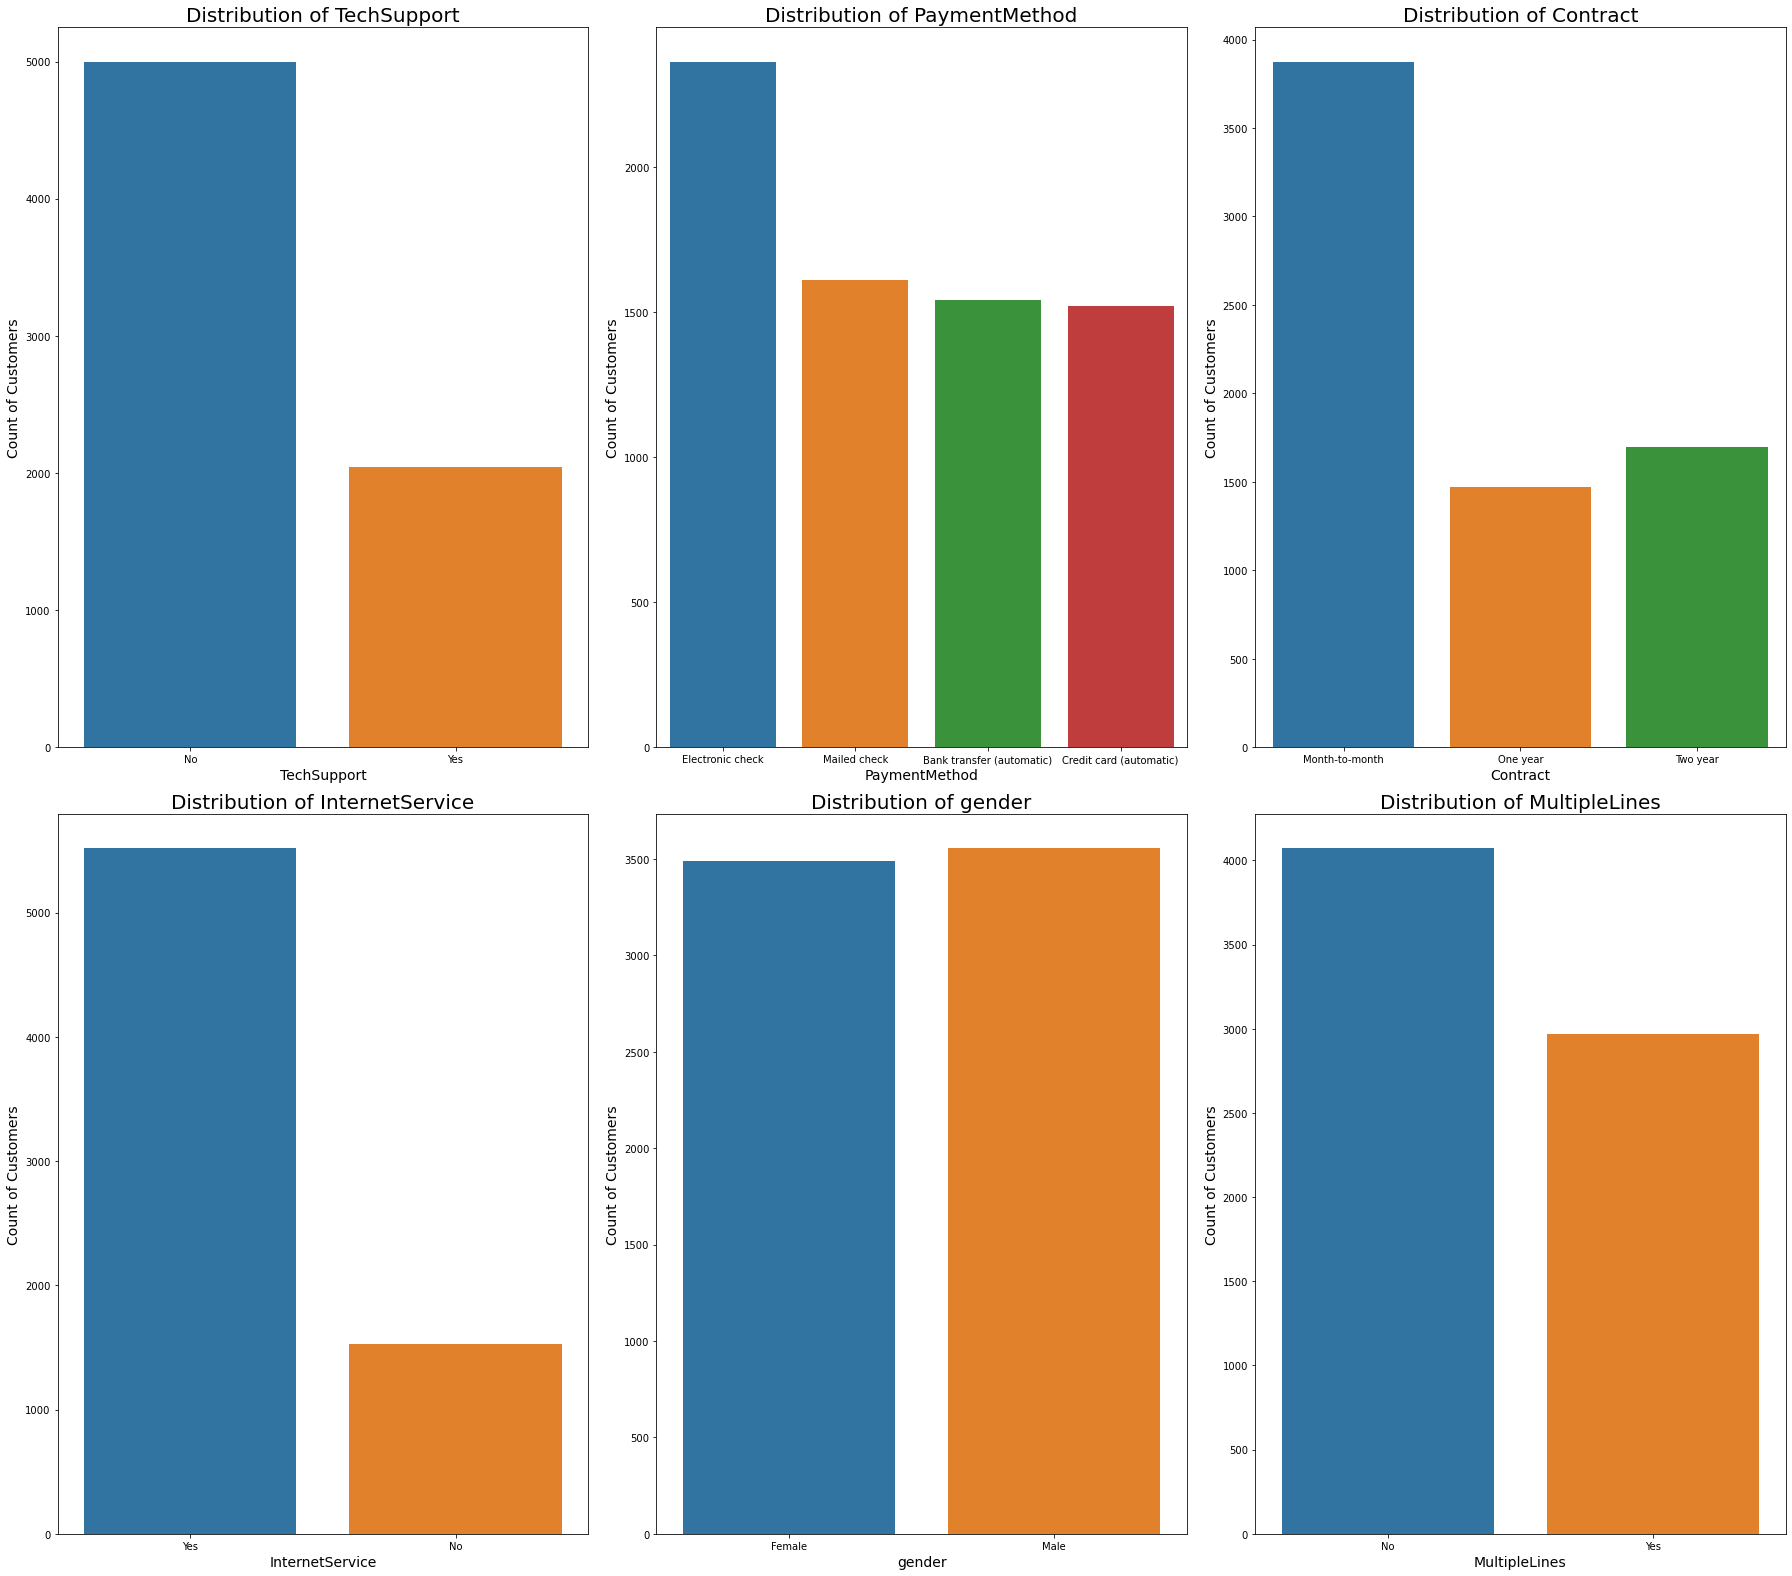

In [8]:
fig, axs = plt.subplots(nrows =2, ncols = 3, figsize=(25, 22))

sns.countplot(x="TechSupport", data= df, ax=axs[0,0])
axs[0,0].set_ylabel("Count of Customers",fontsize =14)
axs[0,0].set_xlabel("TechSupport", fontsize =14)
axs[0,0].set_title("Distribution of TechSupport", fontsize =20)

sns.countplot(x="PaymentMethod", data= df, ax=axs[0,1])
axs[0,1].set_ylabel("Count of Customers",fontsize =14)
axs[0,1].set_xlabel("PaymentMethod",fontsize =14)
axs[0,1].set_title("Distribution of PaymentMethod", fontsize =20)

sns.countplot(x="Contract", data= df, ax=axs[0,2])
axs[0,2].set_ylabel("Count of Customers",fontsize =14)
axs[0,2].set_xlabel("Contract",fontsize =14)
axs[0,2].set_title("Distribution of Contract", fontsize =20)

sns.countplot(x="InternetService", data= df, ax=axs[1,0])
axs[1,0].set_ylabel("Count of Customers",fontsize =14)
axs[1,0].set_xlabel("InternetService",fontsize =14)
axs[1,0].set_title("Distribution of InternetService", fontsize =20)

sns.countplot(x="gender", data= df, ax=axs[1,1])
axs[1,1].set_ylabel("Count of Customers",fontsize =14)
axs[1,1].set_xlabel("gender",fontsize =14)
axs[1,1].set_title("Distribution of gender", fontsize =20)

sns.countplot(x="MultipleLines", data= df, ax=axs[1,2])
axs[1,2].set_xlabel("MultipleLines",fontsize =14)
axs[1,2].set_ylabel("Count of Customers",fontsize =14)
axs[1,2].set_title("Distribution of MultipleLines", fontsize =20)

plt.tight_layout()

plt.show();

### Observations:
- The visualisation shows that about 1900 customers have left the company at the time the data was collated
- Most customers (2500) made payment via electronic check compared to other payment methods
- More than 50% of the client base preffered the monthly subscription package compared to other offerings
- Less than 25% of the client base are without any form of internet access
- No significant diffrence in the gender disctribution of the client base
- 70% of the customers do not utilise multiple lines

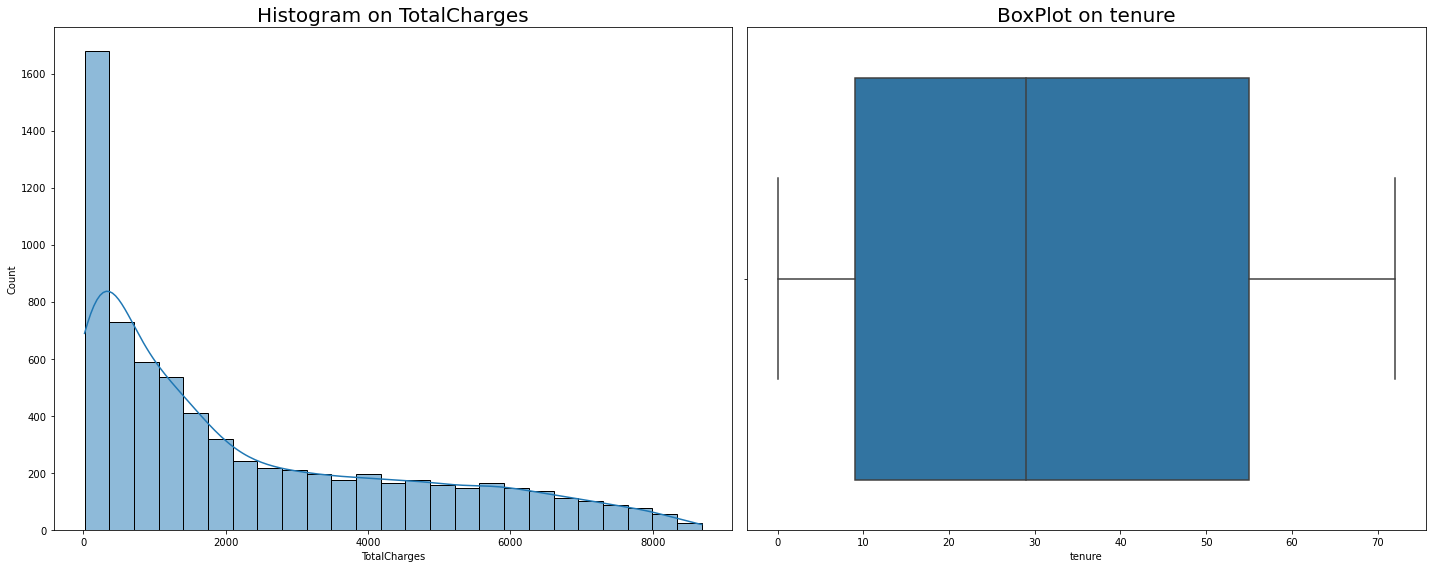

In [9]:
fig, axs = plt.subplots(1,2, figsize=(20,8))

sns.histplot(x="TotalCharges", data=df, kde=True,ax=axs[0])
axs[0].set_title("Histogram on TotalCharges", fontsize =20);
axs[0].grid(False)

sns.boxplot(x="tenure", data=df, ax=axs[1])
axs[1].set_title("BoxPlot on tenure", fontsize =20);
axs[1].grid(False)

plt.tight_layout()
plt.show();


### Observations
- The histogram for total charges show right skewed dataset. This shows that the median is way lower than the mean of the data set
- The box plot is slightly right skewed and there are no outliers in this feature 

### Bivariate analysis

In [10]:
positive_churn = df[df["Churn"] == 1]
positive_churn


,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,LivingWith,StreamingServices,PhoneSecurity
2,Male,0,2,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,108.15,1,0,0,1
4,Female,0,2,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,151.65,1,0,0,0
5,Female,0,8,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,820.50,1,0,1,1
8,Female,0,28,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,1,1,1,1
13,Male,0,49,Yes,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),5036.30,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,12,Yes,No,Yes,Yes,One year,Yes,Electronic check,727.80,1,0,1,0
7026,Female,0,9,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),403.35,1,0,0,0
7032,Male,1,1,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,75.75,1,0,0,0
7034,Female,0,67,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),6886.25,1,0,1,1


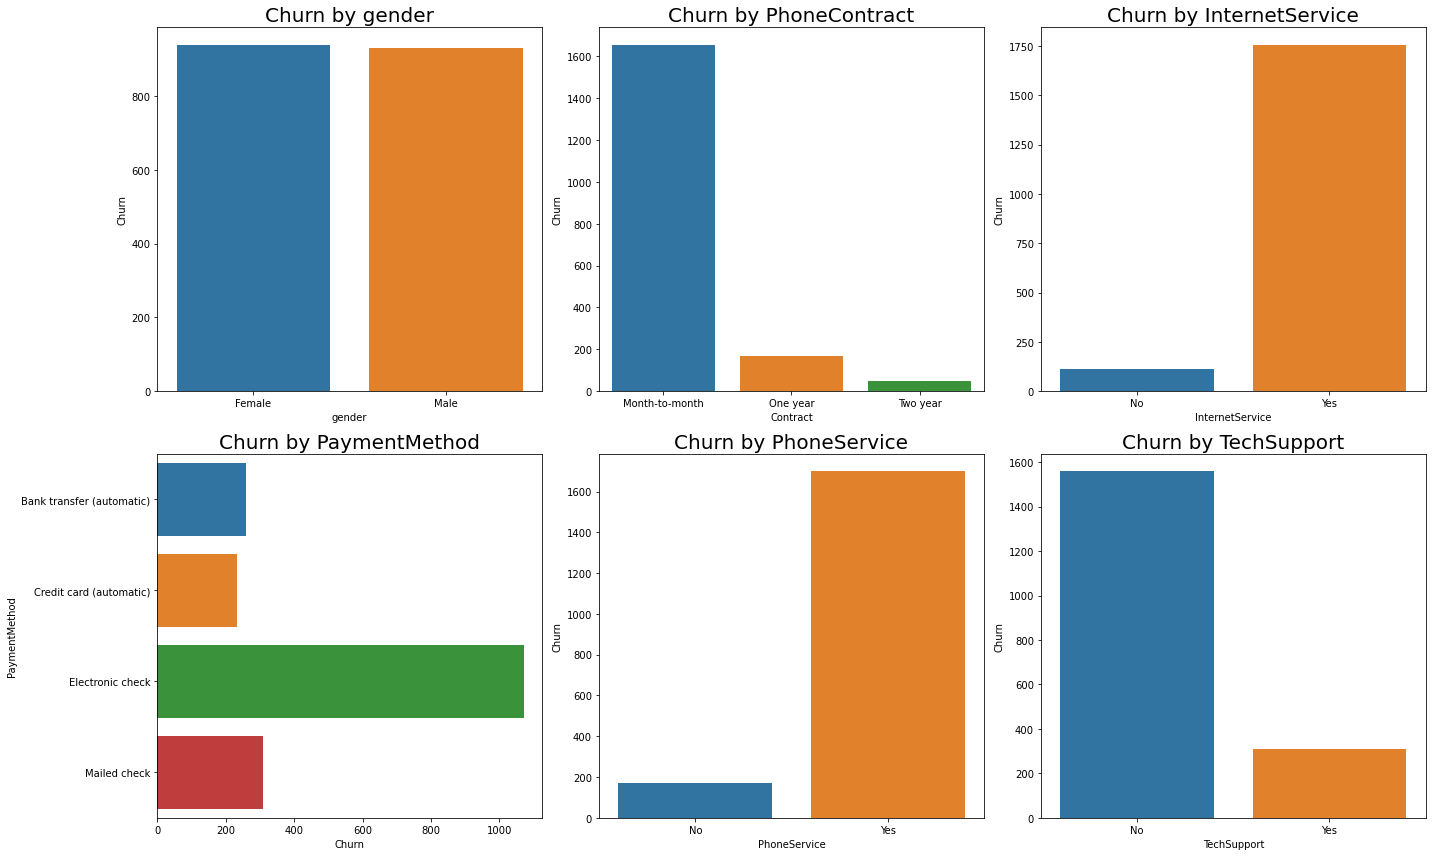

In [11]:
#Establishing the relationship between churn and other variables
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

churn_gender = positive_churn.groupby("gender")["Churn"].count().reset_index()
churn_gender
sns.barplot(x="gender", y="Churn", data = churn_gender, ax=axs[0,0])
axs[0,0].set_title("Churn by gender",fontsize =20)

churn_contract = positive_churn.groupby("Contract")["Churn"].count().reset_index()
churn_contract
sns.barplot(x="Contract", y="Churn", data = churn_contract, ax=axs[0,1])
axs[0,1].set_title("Churn by PhoneContract",fontsize =20);

churn_int = positive_churn.groupby("InternetService")["Churn"].count().reset_index()
churn_int
sns.barplot(x="InternetService", y="Churn", data = churn_int, ax=axs[0,2])
axs[0,2].set_title("Churn by InternetService",fontsize =20);

churn_paymethod = positive_churn.groupby("PaymentMethod")["Churn"].count().reset_index()
churn_paymethod
sns.barplot(y="PaymentMethod", x="Churn", data = churn_paymethod, ax=axs[1,0])
axs[1,0].set_title("Churn by PaymentMethod",fontsize =20)

churn_phoneservice = positive_churn.groupby("PhoneService")["Churn"].count().reset_index()
churn_phoneservice
sns.barplot(x="PhoneService", y="Churn", data = churn_phoneservice, ax=axs[1,1])
axs[1,1].set_title("Churn by PhoneService",fontsize =20);

churn_Techsup = positive_churn.groupby("TechSupport")["Churn"].count().reset_index()
churn_Techsup
sns.barplot(x="TechSupport", y="Churn", data = churn_Techsup, ax=axs[1,2])
axs[1,2].set_title("Churn by TechSupport",fontsize =20)

plt.tight_layout()
plt.show();

### Observation
- There are no significant diffenrence between the distribution of gender that left the company 
- Most of the clients who left the company were subscribed to Monthly packages
- Intrestingly, majority of clients with internet services left the company as opposed to those who dont have internet service
- Clients who use the electronic check payment method, have the highest number of exit from the company
- Individuals with phone service also left the company, further analysis will be carried out to find out the reason
- As expected, Clients who lacked technical support left the company for alternative

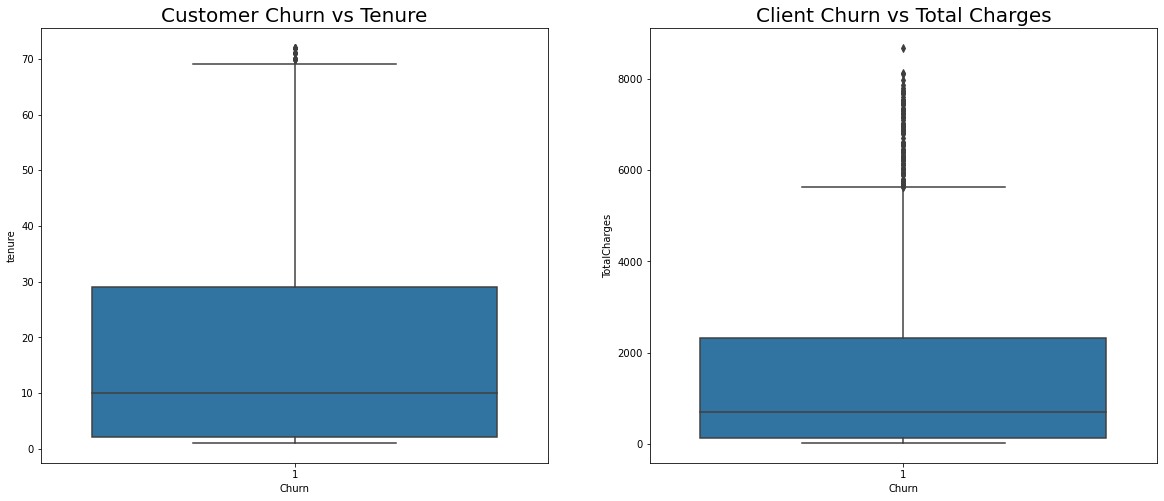

In [12]:
fig, axs = plt.subplots(1,2,figsize=(20,8))

sns.boxplot(x="Churn", y="tenure", data= positive_churn, ax=axs[0])
axs[0].set_title("Customer Churn vs Tenure", fontsize =20);

sns.boxplot(x="Churn", y="TotalCharges", data=positive_churn, ax=axs[1])
axs[1].set_title("Client Churn vs Total Charges", fontsize =20);


### Observation
- There is presence of outliers in the duration of contract of the clients with the company
- The total charges paid by clients who left the company shows severe skewness of the data set

### MultiVariate Analysis

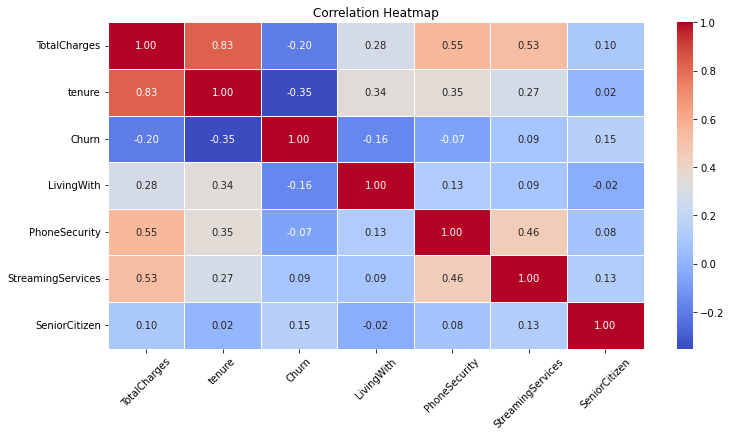

In [13]:
#multivariate analysis for categiorical features
#create a list
#heatmap ar useful in correlation analysis
plt.figure(figsize=(12,6))
cate = ["TotalCharges","tenure","Churn","LivingWith","PhoneSecurity", "StreamingServices","SeniorCitizen"]
sns.heatmap(df[cate].corr(),annot = True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)
plt.tight_layout
plt.show();

### Observations
- The heatmap shows some level of correlation between various features in our data set
- There is a strong positive correlation between the total charges and client tenure with the  company
- Weak correlation between family size and client churn


##  Phase three 
- Model Buiding and Testing 

In [14]:
df.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,LivingWith,StreamingServices,PhoneSecurity
0,Female,0,1,No,No,Yes,No,Month-to-month,Yes,Electronic check,29.85,0,1,0,1
1,Male,0,34,Yes,No,Yes,No,One year,No,Mailed check,1889.50,0,0,0,1
2,Male,0,2,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,108.15,1,0,0,1
3,Male,0,45,No,No,Yes,Yes,One year,No,Bank transfer (automatic),1840.75,0,0,0,1
4,Female,0,2,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,151.65,1,0,0,0


In [15]:
#creating "target" variable for the machine learning
target = df.pop("Churn")
target


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [16]:
# to proceed with building the model, the categorical data are encoded to ensure good performance
# to encode our data,

df = pd.get_dummies(df, drop_first = True)
df

,SeniorCitizen,tenure,TotalCharges,LivingWith,StreamingServices,PhoneSecurity,gender_Male,PhoneService_Yes,MultipleLines_Yes,InternetService_Yes,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,1,0,1,0,0,0,1,0,0,0,1,0,1,0
1,0,34,1889.50,0,0,1,1,1,0,1,0,1,0,0,0,0,1
2,0,2,108.15,0,0,1,1,1,0,1,0,0,0,1,0,0,1
3,0,45,1840.75,0,0,1,1,0,0,1,1,1,0,0,0,0,0
4,0,2,151.65,0,0,0,0,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,1990.50,1,1,1,1,1,1,1,1,1,0,1,0,0,1
7039,0,72,7362.90,1,1,1,0,1,1,1,0,1,0,1,1,0,0
7040,0,11,346.45,1,0,1,0,0,0,1,0,0,0,1,0,1,0
7041,1,4,306.60,1,0,0,1,1,1,1,0,0,0,1,0,0,1


In [17]:
# to deal with the outliers seen in EDA, normalisation is utilised
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#instantiate the library
imputer = SimpleImputer(strategy = 'mean')
df_transform = imputer.fit_transform(df)


scaler = MinMaxScaler()
#to scale our dataset 
df_scaled = scaler.fit_transform(df_transform)
df_scaled

array([[0.        , 0.01388889, 0.0012751 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.47222222, 0.21586661, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.02777778, 0.01031041, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.15277778, 0.03780868, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.05555556, 0.03321025, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91666667, 0.78764136, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
# to split our data set into train and test, import the library
from sklearn.model_selection import train_test_split

#create a variable to hold the split method
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, train_size = 0.8, random_state = 1)



In [19]:
#Import models from python module
# logistics Regression, Random Forest, and Decision Trees are the models to be tested.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#evaluation metrics for classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Baseline model
from sklearn.dummy import DummyClassifier


In [20]:
# Create a majority class classifier (baseline model)
baseline_model = DummyClassifier(strategy="most_frequent")

# Train the baseline model (no training needed for the majority class classifier)
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline)
recall = recall_score(y_test, y_pred_baseline)
f1 = f1_score(y_test, y_pred_baseline)
AUC_roc = roc_auc_score(y_test,y_pred_baseline)

# Print evaluation metrics
print("Baseline Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC_ROC: {AUC_roc}")

print(classification_report(y_test,y_pred_baseline))

Baseline Model Evaluation:
Accuracy: 0.7530163236337828
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC_ROC: 0.5
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1061
           1       0.00      0.00      0.00       348

    accuracy                           0.75      1409
   macro avg       0.38      0.50      0.43      1409
weighted avg       0.57      0.75      0.65      1409



#### Observations
- The baseline model shows an accuracy score of 75%, meaning at 25% of the times it will predict wrongly.


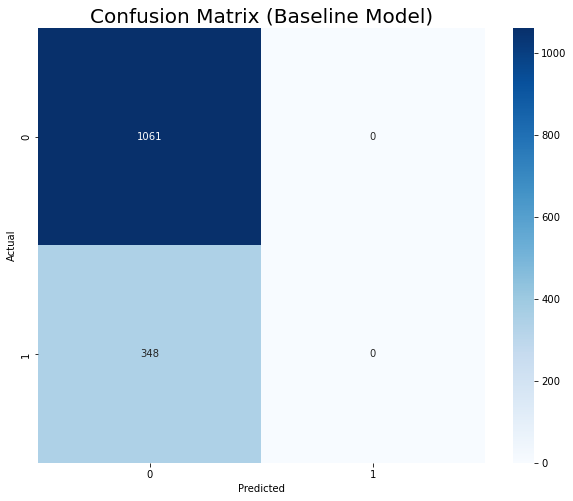

In [21]:
#Confusion matrix for the baseline model

baseline_model_cm = confusion_matrix(y_test,y_pred_baseline)

#to visualise the matrix
plt.figure(figsize=(10,8))
sns.heatmap(baseline_model_cm,annot=True,cmap="Blues",fmt="g")
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("Confusion Matrix (Baseline Model)", fontsize = 20)
plt.show();

### Observations
- Given the accuracy score of the baseline model, the true positive is a true representation of the 75% score
- The model has a false negative instances of 348 in the data set

### Logistic Regression Model 

In [22]:
#to train Logistic regression model,
#Instantiate model

logreg = LogisticRegression()

#fit transformer to train the data
logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:",round(accuracy_score(y_test, ly_pred), 2))
print("Precision:", round(precision_score(y_test,ly_pred), 2))
print("Recall:", round(recall_score(y_test,ly_pred), 2))
print("F1-score:", round(f1_score(y_test,ly_pred), 2))
print("AUC_ROC:", round(roc_auc_score(y_test,ly_pred), 2))

print(classification_report(y_test,ly_pred))

Logistic Regression
Accuracy: 0.81
Precision: 0.63
Recall: 0.57
F1-score: 0.6
AUC_ROC: 0.73
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.63      0.57      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



### Observation 
- The model has an overall accuracy of 81% in predicitng customer churn
- The model average precision, recall and F1-Score across both class 0 and 1 is aroung 75%
- The model weighted average precision , recall, F1-Score is 81%. This puts into consideration the imbalance in the number of instances for each class.
- Overall, the model seems to perform better in predicting customers who do not churn (class 0) compared to those who do churn (class 1), as indicated by higher precision, recall, and F1-score for class 0. 
- However, the model's performance on predicting churners is still reasonable, with an F1-score of 0.60.

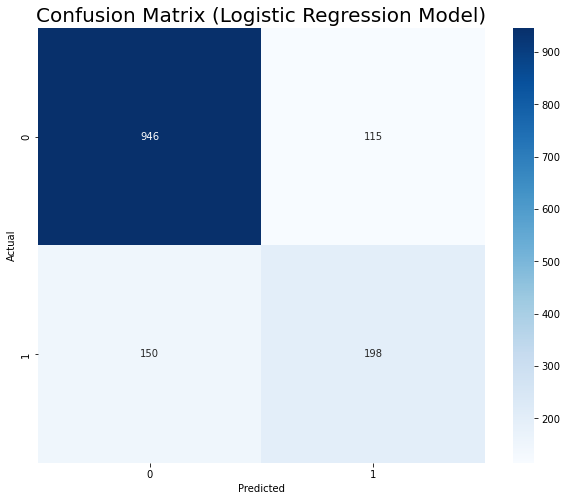

In [35]:
##Confusion matrix for the baseline model

logreg_cm = confusion_matrix(y_test, ly_pred)

#to visualise the matrix
plt.figure(figsize=(10,8))
sns.heatmap(logreg_cm,annot=True,cmap="Blues",fmt="g")
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression Model)", fontsize=20)
plt.show();

### observations
- The confusion matrix shows that the model 
  - predicted 115 instances wrongly as these are false positives
  - 150 instances as negative however these instances are positive.
  - model predicted 946 instances correctly as true positive and 198 as true negatives

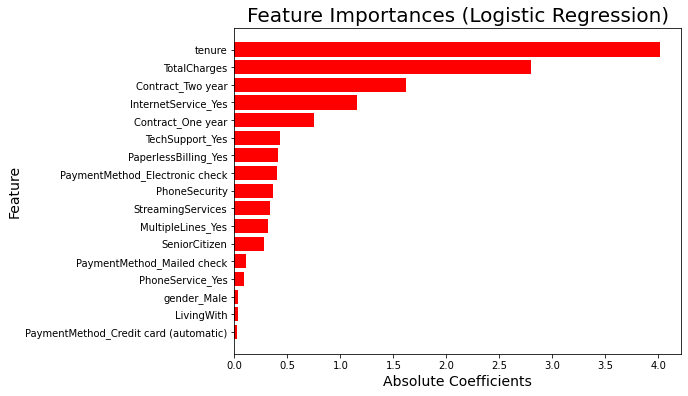

In [24]:
# features importances
# Retrieve the coefficients and feature names

coefficients = logreg.coef_[0]
feature_names = df.columns  # Assuming X is your feature matrix with column names

# Take the absolute values of coefficients
absolute_coefficients = np.abs(coefficients)

# Sort coefficients and feature names simultaneously
sorted_indices = np.argsort(absolute_coefficients)
sorted_coefficients = absolute_coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(sorted_feature_names, sorted_coefficients, color = "r")
plt.xlabel('Absolute Coefficients', fontsize=14)
plt.ylabel('Feature', fontsize =14)
plt.title('Feature Importances (Logistic Regression)', fontsize=20)
plt.show();


### Observations
- The features importances chart shows tenure, total charges, contract type, tech support are crucial in customer churn.
- Gender, family size, and payment methods are negligible features and conditions in client churn

### Random Forest Classifier Model

In [36]:
#Instantiate model

rfc = RandomForestClassifier()

#fit transformer to train the data
rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:",round(accuracy_score(y_test, rfy_pred), 2))
print("Precision:", round(precision_score(y_test,rfy_pred), 2))
print("Recall:", round(recall_score(y_test,rfy_pred), 2))
print("F1-score:", round(f1_score(y_test,rfy_pred), 2))
print("AUC_ROC:", round(roc_auc_score(y_test,rfy_pred), 2))

print(classification_report(y_test,rfy_pred))

Random Forest Classifier
Accuracy: 0.79
Precision: 0.59
Recall: 0.5
F1-score: 0.54
AUC_ROC: 0.69
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1061
           1       0.59      0.50      0.54       348

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### Observation
- The model has an overall accuracy of 79% in predictng customer churn.

- For Class 0 (Non-Churners):
   - Precision of 84% of the instances predicted non-churners.
   - Recall of 0.88 shows the model correctly identifies 88% of all actual non-churners.
   - F1-score of 0.86 is the harmonic mean of precision and recall, providing a balance between the two metrics.

- For Class 1 (Churners):
  - Precision of 0.59 indicates that 59% of the instances predicted churners.
  - Recall of 0.50 suggests that the model identifies only 50% of all actual churners.
  - F1-score of 0.54 represents the balance between precision and recall for this class.

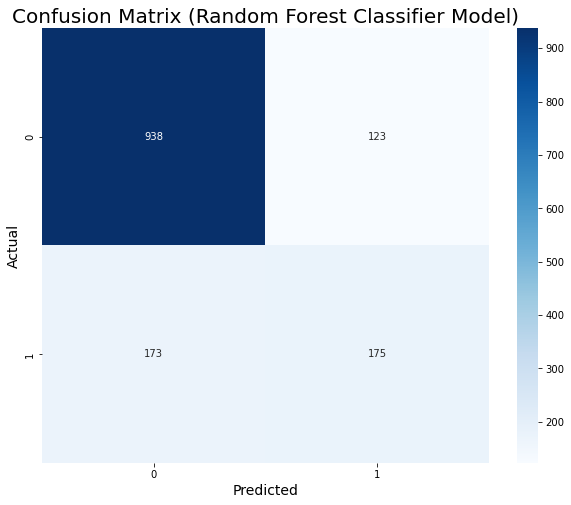

In [37]:
rfc_cm = confusion_matrix(y_test, rfy_pred)

#to visualise the matrix
plt.figure(figsize=(10,8))
sns.heatmap(rfc_cm,annot=True,cmap="Blues",fmt="g")
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel("Actual", fontsize = 14)
plt.title("Confusion Matrix (Random Forest Classifier Model)", fontsize = 20)
plt.show();

### Observations
- The confusion matrix shows the random forest classifier model predicited 173 positive instances wrongly
- 123 negative instances were predicted as positive
- 938 positves instances were predicted correctly
- 175 negative instances were predicted correctly

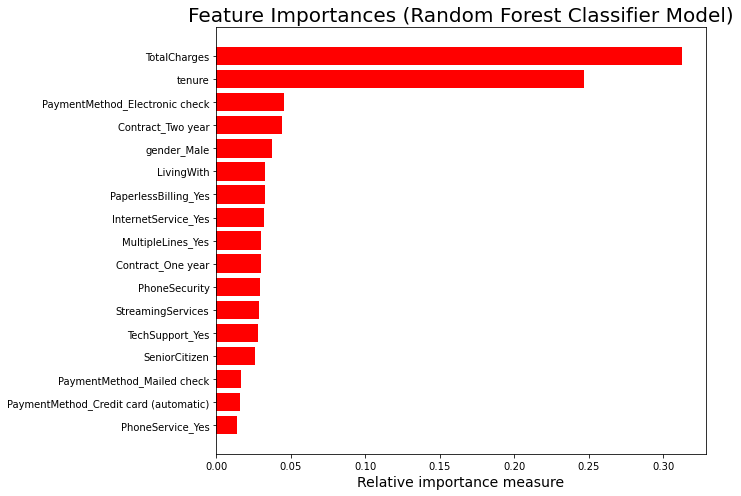

In [38]:
## Features Importance for Random Forest Classifier Model
importances = rfc.feature_importances_

#using numpy fucntion to arrange in ascending order
sort_imp=np.argsort(importances)

#create a variable that holds all the variables in the dataset
names= list(df.columns)

#plot visualisation
plt.figure(figsize=(10,7))
plt.barh(range(len(sort_imp)),importances[sort_imp],color ="r")
plt.yticks(range(len(sort_imp)),[names[x] for x in sort_imp])
plt.title("Feature Importances (Random Forest Classifier Model)", fontsize = 20)
plt.xlabel("Relative importance measure", fontsize =14)
plt.tight_layout()
plt.show();

### Observations
- The features importances chart shows tenure, total charges are crucial in customer churn.
- phone service, age, and payment methods are negligible features and conditions in client churn

### KNeighbors Classifier Model

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("KNeighbors Classifier")
print("Accuracy:",round(accuracy_score(y_test, knn_pred), 2))
print("Precision:", round(precision_score(y_test,knn_pred), 2))
print("Recall:", round(recall_score(y_test,knn_pred), 2))
print("F1-score:", round(f1_score(y_test,knn_pred), 2))
print("AUC_ROC:", round(roc_auc_score(y_test,knn_pred), 2))

print(classification_report(y_test,knn_pred))

KNeighbors Classifier
Accuracy: 0.77
Precision: 0.53
Recall: 0.51
F1-score: 0.52
AUC_ROC: 0.68
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1061
           1       0.53      0.51      0.52       348

    accuracy                           0.77      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.77      0.77      0.77      1409



## Observation
- The model has an overall accuracy of 77% in predictIng customer churn.

For Class 0 (Non-Churners):

- Precision of 84% of the instances predicted non-churners.
- Recall of 0.85 shows the model correctly identifies 85% of all actual non-churners.
- F1-score of 0.85 is the harmonic mean of precision and recall, providing a balance between the two metrics.

For Class 1 (Churners):

- Precision of 0.53 indicates that 53% of the instances predicted churners.
- Recall of 0.51 suggests that the model identifies only 51% of all actual churners.
- F1-score of 0.52 represents the balance between precision and recall for this class.

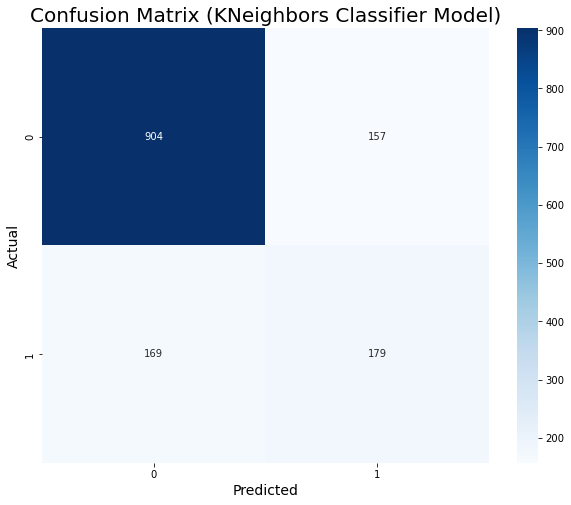

In [40]:
## Confusion Matrix

knn_cm = confusion_matrix(y_test, knn_pred)

#to visualise the matrix
plt.figure(figsize=(10,8))
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="g")
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel("Actual", fontsize = 14)
plt.title("Confusion Matrix (KNeighbors Classifier Model)", fontsize = 20)
plt.show();


### Observations
- The confusion matrix shows the random forest classifier model predicited 169 positive instances wrongly
- 157 negative instances were predicted as positive
- 904 positves instances were predicted correctly
- 179 negative instances were predicted correctly

### HyperParameter Optimisation for the trained machine learning models

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer,r2_score

In [41]:
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

# Iterate over each model
results = {}
for model_name, (model, param_grid) in models.items():
    # Create a GridSearchCV object for the model
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    
    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {model_name}: {best_params}")
    
    # Make predictions on the test data using the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Calculate the accuracy of the best model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy}")
    
    # Store results
    results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

# Print results
print("\nResults:")
for model_name, result in results.items():
    print(f"{model_name}: {result}")

Best Hyperparameters for Logistic Regression: {'C': 10}
Accuracy for Logistic Regression: 0.8119233498935415
Best Hyperparameters for Random Forest: {'max_depth': 10, 'n_estimators': 150}
Accuracy for Random Forest: 0.8105039034776437
Best Hyperparameters for K-Nearest Neighbors: {'n_neighbors': 7}
Accuracy for K-Nearest Neighbors: 0.7686302342086586

Results:
Logistic Regression: {'best_params': {'C': 10}, 'accuracy': 0.8119233498935415}
Random Forest: {'best_params': {'max_depth': 10, 'n_estimators': 150}, 'accuracy': 0.8105039034776437}
K-Nearest Neighbors: {'best_params': {'n_neighbors': 7}, 'accuracy': 0.7686302342086586}


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1061
           1       0.53      0.49      0.51       348

    accuracy                           0.77      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.76      0.77      0.77      1409



### classification report for optimised models
The tuned model has an overall accuracy of 77% in predicitng customer churn.

TFor Class 0 (Non-Churners):

- Precision of 84% of the instances predicted non-churners.
- Recall of 0.86 shows the model correctly identifies 86% of all actual non-churners.
- F1-score of 0.85 is the harmonic mean of precision and recall, providing a balance between the two metrics.

For Class 1 (Churners):

- Precision of 0.53 indicates that 53% of the instances predicted churners.
- Recall of 0.49 suggests that the model identifies only 49% of all actual churners.
- F1-score of 0.51 represents the balance between precision and recall for this class.

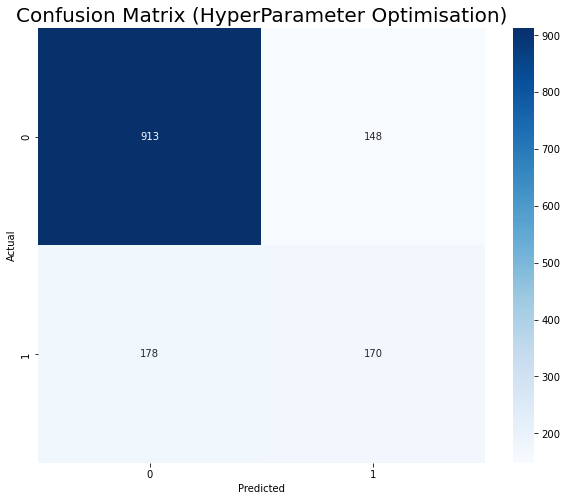

In [44]:
#confusion matrix for HyperParameter Tunning

hcm = confusion_matrix(y_test, y_pred)

#to visualise the matrix
plt.figure(figsize=(10,8))
sns.heatmap(hcm,annot=True,cmap="Blues",fmt="g")
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("Confusion Matrix (HyperParameter Optimisation)", fontsize=20)
plt.show();

### Observations
- 913 positive instances were predicted correctly by the tuned model
- 148 negatives were predicted as positives
- 178 Positive instances were wrongly predicted by the model as negative
- 170 negative churn were predicted accurately by the model.

### Observations


Logistic Regression Model:

- Best Hyperparameters: C=10
- Accuracy: 0.8119 (approximately 81.19%)
- Interpretation: With a regularization parameter (C) set to 10, the Logistic Regression model achieved an accuracy of approximately 81.19%.

Random Forest Model:

- Best Hyperparameters: max_depth=10, n_estimators=150
- Accuracy: 0.8070 (approximately 80.70%)
- Interpretation: With a maximum depth of 10 and 150 decision trees in the forest, the Random Forest model achieved an accuracy of approximately 80.70%.

K-Nearest Neighbors Model (KNN):

- Best Hyperparameters: n_neighbors=7
- Accuracy: 0.7686 (approximately 76.86%)
- Interpretation: With 7 neighbors considered for classification, the KNN model achieved an accuracy of approximately 76.86%.

In summary, the Logistic Regression model performed the best among the three models, achieving the highest accuracy of approximately 81.19% with the chosen hyperparameter settings. The Random Forest model followed closely behind with an accuracy of approximately 80.70%, while the KNN model had a slightly lower accuracy of approximately 76.86%.

### Conclusion
- Considering the metrics, the logistic regression model performed best given the higher recall score and accuracy.